This notebook is for checking the converted TFRecords data and visualizing rotated images

## Imports, constants and path

In [1]:
import tensorflow as tf
import numpy as np
import pickle 
import read_tfrecord
import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="2"

BATCH_SIZE = 10
TRAIN_TFRECORD_PATH = "./dataset/tfrecords/train"
VALID_TFRECORD_PATH = "./dataset/tfrecords/valid"
TEST_TFRECORD_PATH = "./dataset/tfrecords/test"

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Check original dataset
- In read_tfrecord.read_tfrecord() function
  - rotation_degree=0
  - do_crop=False

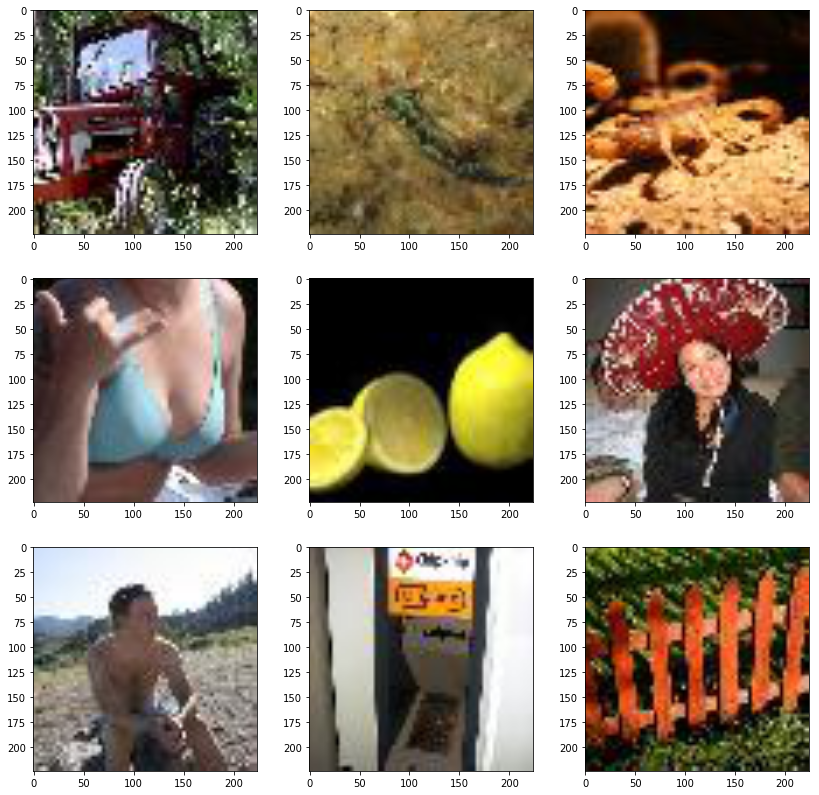

In [3]:
""" Check dataset (train, validation, test)    

"""
g = tf.Graph()
with g.as_default():
    read_data_dict = read_tfrecord.read_tfrecord(tfrecord_train_dir=TRAIN_TFRECORD_PATH,
                                                tfrecord_valid_dir=VALID_TFRECORD_PATH,
                                                tfrecord_test_dir=TEST_TFRECORD_PATH,
                                                batch_size=BATCH_SIZE,
                                                rotation_degree=0,
                                                do_crop=False) 
   
    sess = tf.Session()
    sess.run(read_data_dict['data_initializer_train'])
    X_raw = sess.run(read_data_dict['X'])
    X_restored = X_raw * 0.5
    X_restored += 0.5
    X_restored = X_restored * 255
    X_restored = X_restored.astype(np.uint8)
    fig, axes = plt.subplots(3, 3, figsize=(14,14))
    for y in range(3):
        for x in range(3):
            axes[y][x].imshow(X_restored[x+(y%3)*3])

## Check rotated dataset without cropping
- In read_tfrecord.read_tfrecord() function
  - rotation_degree=45
  - do_crop=False

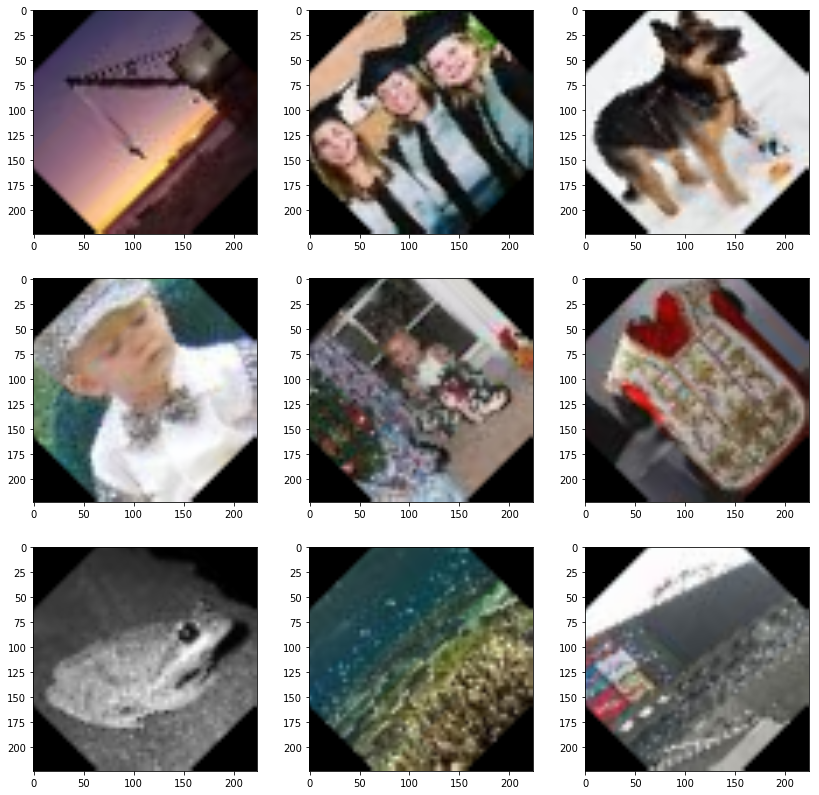

In [4]:
""" Check dataset (train, validation, test)    

"""
g = tf.Graph()
with g.as_default():
    read_data_dict = read_tfrecord.read_tfrecord(tfrecord_train_dir=TRAIN_TFRECORD_PATH,
                                                tfrecord_valid_dir=VALID_TFRECORD_PATH,
                                                tfrecord_test_dir=TEST_TFRECORD_PATH,
                                                batch_size=BATCH_SIZE,
                                                rotation_degree=45,
                                                do_crop=False) 
   
    sess = tf.Session()
    sess.run(read_data_dict['data_initializer_train'])
    X_raw = sess.run(read_data_dict['X'])
    X_restored = X_raw * 0.5
    X_restored += 0.5
    X_restored = X_restored * 255
    X_restored = X_restored.astype(np.uint8)
    fig, axes = plt.subplots(3, 3, figsize=(14,14))
    for y in range(3):
        for x in range(3):
            axes[y][x].imshow(X_restored[x+(y%3)*3])

## Check rotated dataset with cropping
- In read_tfrecord.read_tfrecord() function
  - rotation_degree=45
  - do_crop=True

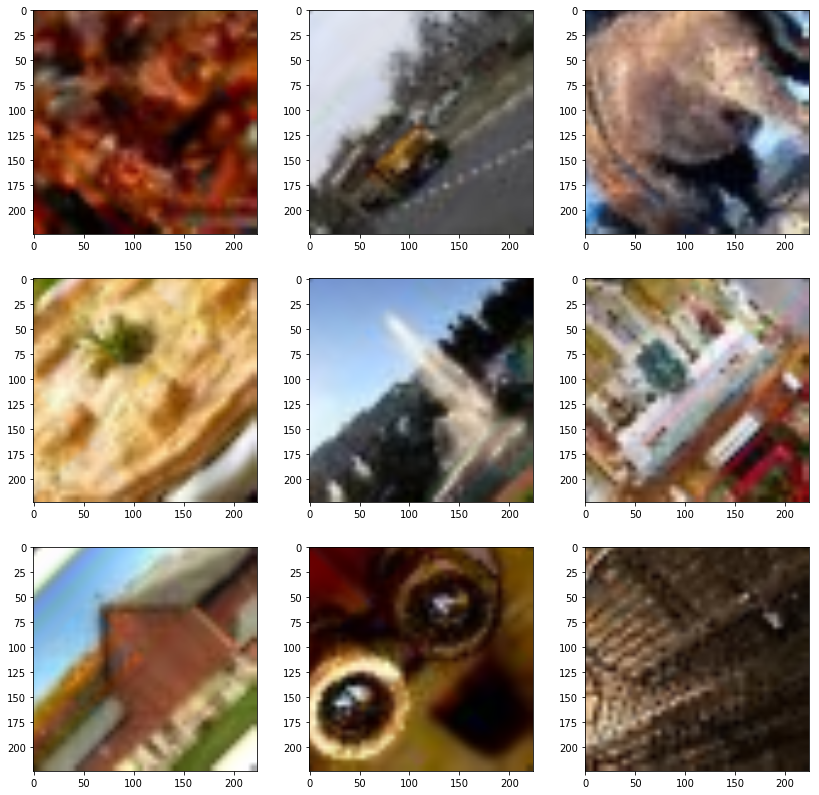

In [6]:
""" Check dataset (train, validation, test)    

"""
g = tf.Graph()
with g.as_default():
    read_data_dict = read_tfrecord.read_tfrecord(tfrecord_train_dir=TRAIN_TFRECORD_PATH,
                                                tfrecord_valid_dir=VALID_TFRECORD_PATH,
                                                tfrecord_test_dir=TEST_TFRECORD_PATH,
                                                batch_size=BATCH_SIZE,
                                                rotation_degree=45,
                                                do_crop=True) 
   
    sess = tf.Session()
    sess.run(read_data_dict['data_initializer_train'])
    X_raw = sess.run(read_data_dict['X'])
    X_restored = X_raw * 0.5
    X_restored += 0.5
    X_restored = X_restored * 255
    X_restored = X_restored.astype(np.uint8)
    fig, axes = plt.subplots(3, 3, figsize=(14,14))
    for y in range(3):
        for x in range(3):
            axes[y][x].imshow(X_restored[x+(y%3)*3])